In [1]:
import warnings
warnings.filterwarnings("ignore")
from run import main
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

In [2]:
# set up dataframe for collecting event data
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneously, randomly, alternatively
"""
SIM_TIME = 1000
scheme = 'randomly'
time_network, adversary = main(finish_time=SIM_TIME, scheme=scheme)

Adversary: Start SCAN_HOST at 0.0s.
MTD: OSDiversity triggered 0.0s
MTD: OSDiversity deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 10.0s.
Adversary: Start ENUM_HOST at 10.0s.
MTD: CompleteTopologyShuffle triggered 23.7s
MTD: CompleteTopologyShuffle deployed in the network at 23.7s.
Adversary: Processed ENUM_HOST at 25.0s.
Adversary: Start SCAN_PORT at 25.0s.
MTD: OSDiversity finished in 42.5s at 42.5s.
MTD: Interrupted SCAN_PORT at 42.5s!
MTD: HostTopologyShuffle triggered 44.4s
MTD: HostTopologyShuffle suspended at 44.4s due to resource occupation
Adversary: Restarting with SCAN_PORT at 44.5s!
Adversary: Start SCAN_PORT at 44.5s.
MTD: CompleteTopologyShuffle finished in 40.6s at 64.3s.
MTD: Interrupted SCAN_PORT at 64.3s!
MTD: HostTopologyShuffle triggered 64.6s
MTD: HostTopologyShuffle deployed in the network at 64.6s.
Adversary: Restarting with SCAN_HOST at 66.3s!
Adversary: Start SCAN_HOST at 66.3s.
Adversary: Processed SCAN_HOST at 76.3s.
Adversary: Start ENUM

In [3]:
mtd_operation_record = pd.DataFrame(time_network.get_mtd_stats().get_record())
attack_operation_record = pd.DataFrame(adversary.get_attack_stats().get_record())
current_directory = os.getcwd()
if not os.path.exists(current_directory+'\\data_analysis'):
    os.makedirs(current_directory+'\\data_analysis')

attack_operation_record.to_csv('data_analysis/attack_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv', index=False)

In [4]:
# print(time_network.get_mtd_stats().dict())
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,OSDiversity,0.000000,42.473192,42.473192,application
1,CompleteTopologyShuffle,23.731998,64.302152,40.570153,network
2,HostTopologyShuffle,64.565722,106.772793,42.207071,network
3,HostTopologyShuffle,128.383144,168.641053,40.257909,network
4,CompleteTopologyShuffle,189.638757,229.951996,40.313240,network


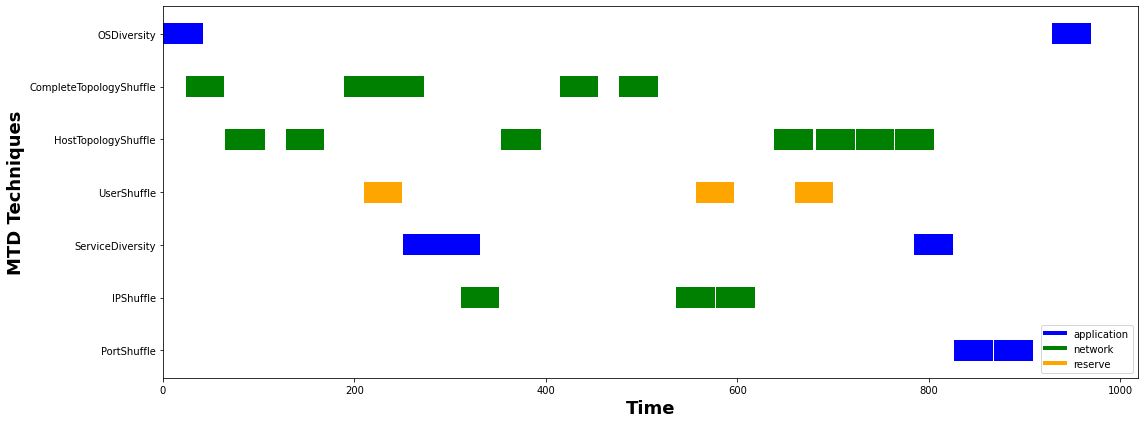

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 6))

colors = ['blue', 'green', 'orange']
mtd_action_legend = []
mtd_action_legend_name = []
for i, v in enumerate(mtd_operation_record['executed_at'].unique()):
    mtd_operation_record.loc[mtd_operation_record['executed_at'] == v, 'color'] = colors[i]
    mtd_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    mtd_action_legend_name.append(v)

ax.barh(mtd_operation_record['name'].astype(str), mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.4, color=mtd_operation_record['color'] )
ax.legend(mtd_action_legend, mtd_action_legend_name, loc='lower right')
plt.gca().invert_yaxis()


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='orange', lw=4)]


plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [6]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,42.473192,17.473192,0,1,0,0,None,[],application,OSDiversity
3,SCAN_PORT,44.473192,64.302152,19.828960,0,1,0,0,None,[],network,CompleteTopologyShuffle
4,SCAN_HOST,66.302152,76.302152,10.000000,-1,0,0,0,None,[],None,None


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


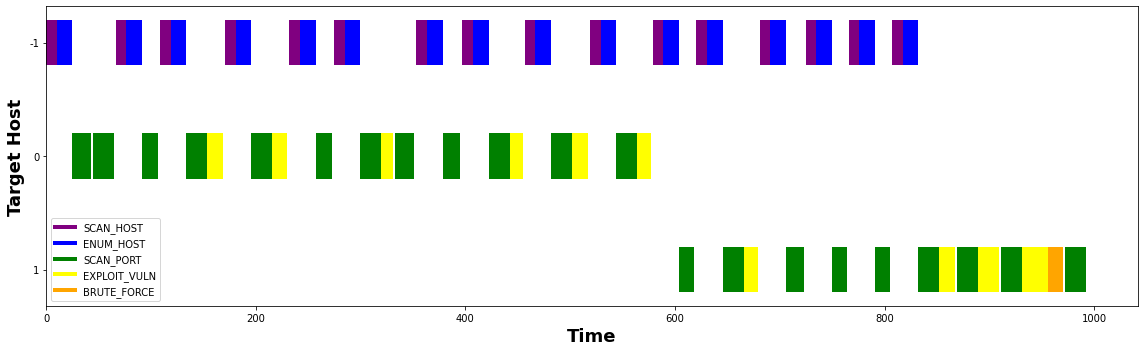

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))

colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']
attack_action_legend = []
attack_action_legend_name = []
for i, v in enumerate(attack_operation_record['name'].unique()):
    attack_operation_record.loc[attack_operation_record.name == v, 'color'] = colors[i]
    attack_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    attack_action_legend_name.append(v)

ax2.barh(attack_operation_record['current_host'].astype(str), attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.4, color=attack_operation_record['color'] )

ax2.legend(attack_action_legend, attack_action_legend_name, loc='lower left')
plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Target Host', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_action_record.png')
plt.show()

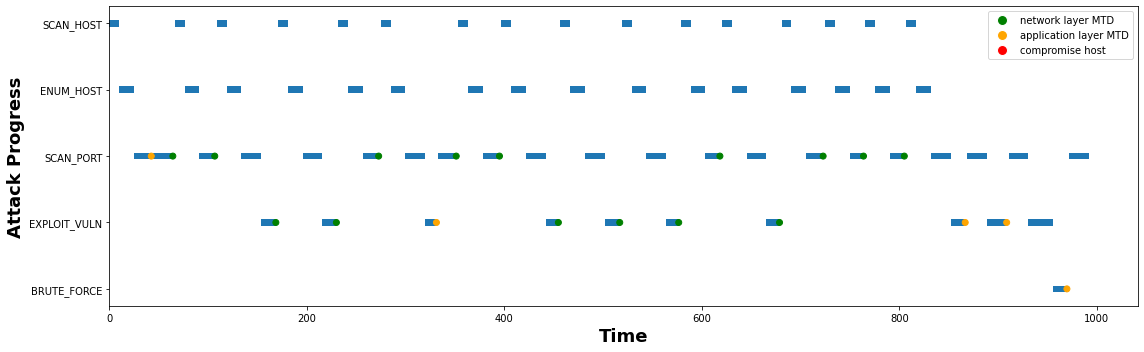

In [8]:
fig4, ax4 = plt.subplots(1, figsize=(16, 5))
ax4.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax4.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax4.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax4.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig4.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [9]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color


In [10]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color


In [11]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
